# Diabetes Prediction

In [34]:
#import the necessary lib
import pandas as pd
import numpy as np
import pickle

In [35]:
df = pd.read_csv(r"C:\Users\BORN 2 CODE\Downloads\diabetes.csv")

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.shape

(768, 9)

In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
df['Outcome'].value_counts()

#here 0 for Non Diabetic and 1 for diabetic



0    500
1    268
Name: Outcome, dtype: int64

In [43]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

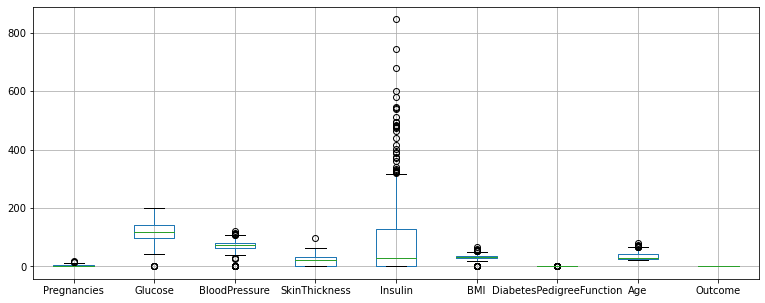

In [45]:
df.boxplot(figsize=(13,5))
plt.show()

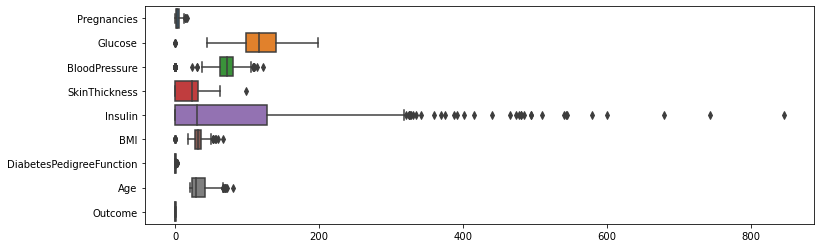

In [46]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,orient='h')
plt.show()

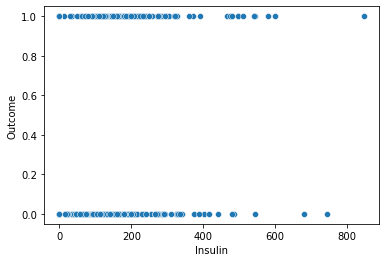

In [47]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])
plt.show()

In [48]:
#seperate the data and labels
X = df.drop(columns='Outcome',axis=1)
Y = df['Outcome']

In [49]:
#X
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [50]:
#Y
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [51]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [52]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [53]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Split Train and Test

In [54]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [55]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=None)

In [58]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
313,3.000000,113.0,50.0,10.000000,85.000000,29.5,0.626,25
286,5.000000,155.0,84.0,44.000000,545.000000,38.7,0.619,34
547,4.000000,131.0,68.0,21.000000,166.000000,33.1,0.160,28
628,5.000000,128.0,80.0,20.536458,79.799479,34.6,0.144,45
450,1.000000,82.0,64.0,13.000000,95.000000,21.2,0.415,23
...,...,...,...,...,...,...,...,...
635,13.000000,104.0,72.0,20.536458,79.799479,31.2,0.465,38
474,4.000000,114.0,64.0,20.536458,79.799479,28.9,0.126,24
719,5.000000,97.0,76.0,27.000000,79.799479,35.6,0.378,52
570,3.000000,78.0,70.0,20.536458,79.799479,32.5,0.270,39


In [59]:
Y_train

313    0
286    0
547    0
628    0
450    0
      ..
635    1
474    0
719    1
570    0
529    0
Name: Outcome, Length: 576, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [61]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [62]:
X_train_std

array([[-0.47428153, -0.28694057, -1.8514647 , ..., -0.44897242,
         0.4522338 , -0.70419472],
       [ 0.20543024,  1.08906665,  0.97777342, ...,  0.89632019,
         0.43111294,  0.06938982],
       [-0.13442564,  0.30277681, -0.35363276, ...,  0.07744643,
        -0.95381249, -0.44633321],
       ...,
       [ 0.20543024, -0.81113379,  0.31207033, ...,  0.44301507,
        -0.29604834,  1.6165589 ],
       [-0.47428153, -1.43361325, -0.18720698, ..., -0.01029005,
        -0.62191315,  0.49915901],
       [-0.1870856 , -0.35246472, -0.60327141, ..., -1.16548697,
         0.55482087, -0.1884717 ]])

# Train our Model

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [64]:
lr.fit(X_train,Y_train)

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
Y_pred=lr.predict(X_test_std)

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
Y_test

206    1
232    0
505    0
382    0
275    0
      ..
455    1
369    1
79     0
231    1
747    0
Name: Outcome, Length: 192, dtype: int64

In [68]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(Y_test,Y_pred) * 100

66.66666666666666

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [75]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [76]:
Y_pred=dt.predict(X_test_std)

In [77]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [78]:
Y_test

206    1
232    0
505    0
382    0
275    0
      ..
455    1
369    1
79     0
231    1
747    0
Name: Outcome, Length: 192, dtype: int64

In [79]:
accuracy_score(Y_test,Y_pred)

0.6979166666666666

# SVM

In [81]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [82]:
#train the SVM Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [83]:
#accuracy on the training data 
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [85]:
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.78125


In [86]:
#accuracy on the test data set
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [87]:
print('Accuracy score of the test data:', test_data_accuracy)

Accuracy score of the test data: 0.7604166666666666


In [96]:
import pickle
file = open('classifier_diabetes.pkl','wb')
pickle.dump(classifier,file)